<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/DecisionRegressor_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
reg_data=[['Asset Flip',100,1000], ['Text Based',500,3000],['Visual Novel',1500,5000],['2D Pixel Art',3500,8000],['2D Vector Art',5000,6500],['Strategy',6000,7500],['First Person Shooter',8000,15000],['Simulator',9500,20000],['Racing',12000,21000],
          ['RPG',14000,25000],['Sandbox',15500,27000],['Open-world',16500,30000],['MMOFPS',25000,52000],['MMORPG',30000,80000]]

In [ ]:
reg_df=pd.DataFrame(reg_data,columns=['ItemName','Sale','Cost'])

In [ ]:
feature_names=['Sale','Cost']

In [ ]:
reg_df

,ItemName,Sale,Cost
0,Asset Flip,100,1000
1,Text Based,500,3000
2,Visual Novel,1500,5000
3,2D Pixel Art,3500,8000
4,2D Vector Art,5000,6500
5,Strategy,6000,7500
6,First Person Shooter,8000,15000
7,Simulator,9500,20000
8,Racing,12000,21000
9,RPG,14000,25000


In [ ]:
x=reg_df.values[:,1:3]
y=reg_df.values[:,0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
cost_tree=DecisionTreeRegressor(random_state=42)
cost_tree.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
x_test=np.array([[12000,25000],[13000,20000],[32000,50000],[23000,45000]])

In [ ]:
y_pred=cost_tree.predict(x_test)

In [ ]:
y_pred

array([ 8., 10.,  4.,  4.])

In [ ]:
y_test=np.array([0,10,4,4])

In [ ]:
print( "Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  75.0


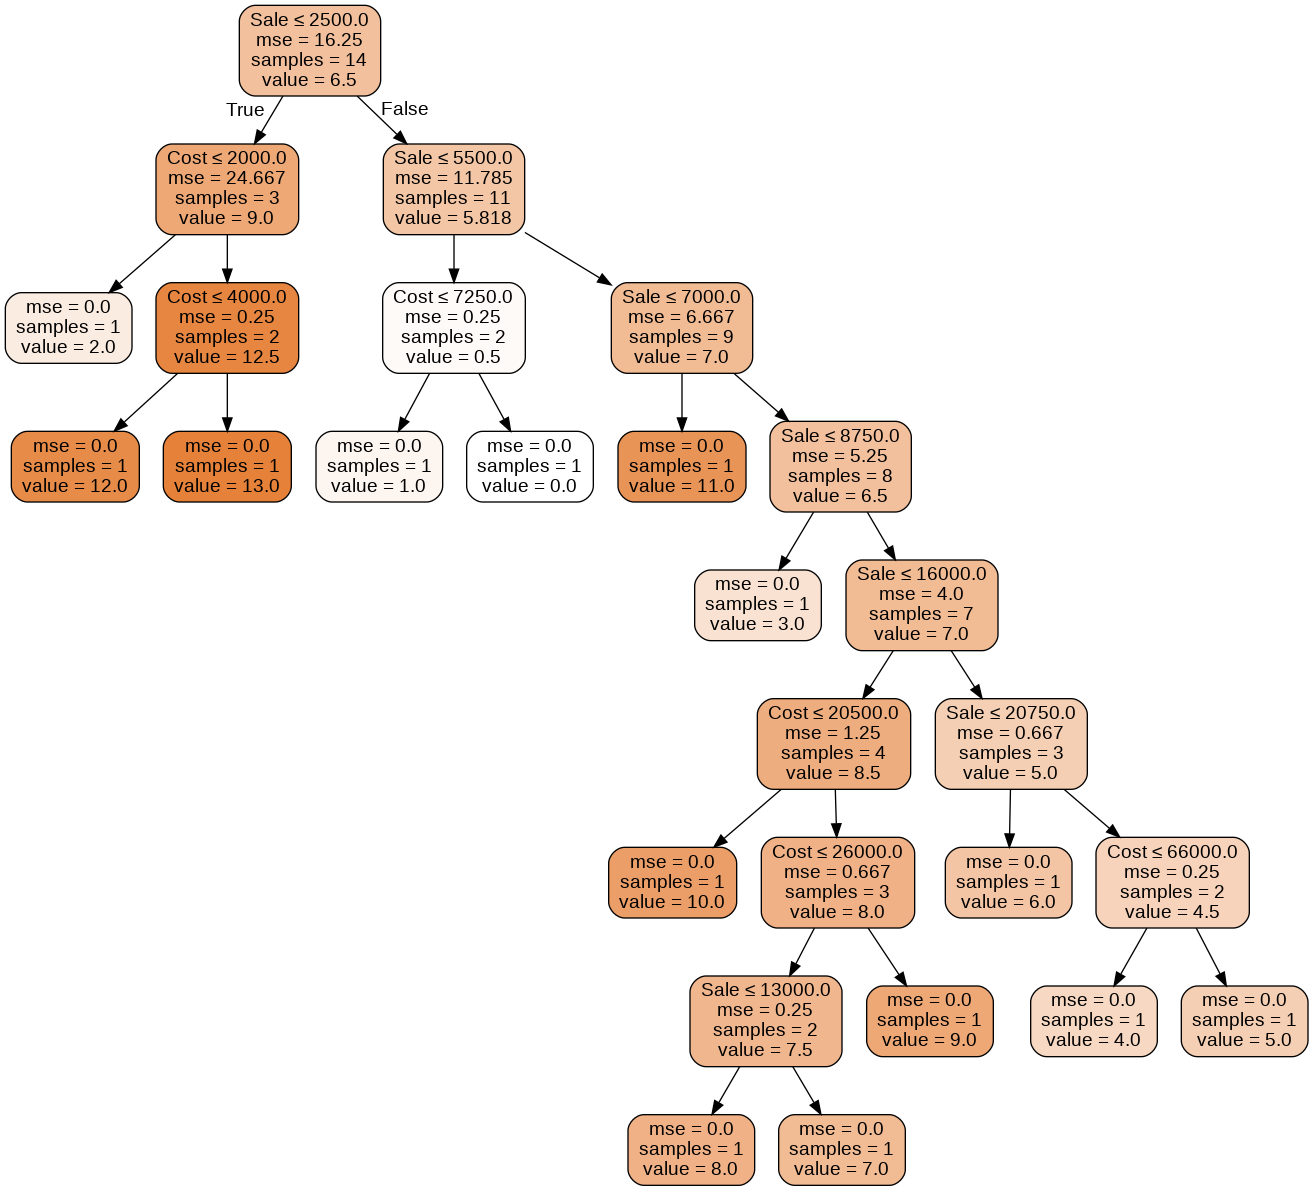

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(cost_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('CostTree.png')
Image(graph.create_png())